# Functions

In [ ]:
#Import the SeqIO module from the Bio package to read and write sequence data in different file formats.
#Import the Seq class from the Seq module from the Bio package to perform sequences related functions.
#Import the Pandas library and assigns it as pd for data manipulation.

In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd 


# 1.Document Dr. X's function with comments. 

In [ ]:
#Dr. X defined a function that will select sequences from fasta file.
#Open empty dictionary to store sequence data.
#Read and write sequence data one by one from the file in fasta format using Biopython's SeqIO.parse() and store them in the dictionary.
#Splits the entries in files based on whitespace characters (tab/newline/space) to subset description.
#Combine description1 and description2 from the decription with a space between and call it as species_name.
#In sequence data dictonary set species_name associated with each sequence as key and keep it as record.seq object.
#The dictionary will go to the first function to select  sequences from fasta file for the next entry.
#Define the fasta_fn and check the function of the code by printing the sequences. 



In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict

#fasta_fn = "penguins_cytb.fasta"
#sequences = get_sequences_from_file(fasta_fn)
#print(sequences)


# 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [ ]:
#Import class CodonTable from module Data of Bio package to access codon tables.
#Defined a function that will translate nucleoties.
#Call the Vertebrate Mitochondrial table.
#Open an empty string to store the amino acid sequences.
#Open a loop to define the range of the nucleotide sequence, starting from 0 and incrementing by 3 until the end of the sequence by processing the sequence in groups of three nucleotides.
#Consider a codon to be every three nucleotides starting from index i and ending at index i+3 in nucleotide sequence.
#If the loop come accross any given codon sequences, break the loop and stop translation.
#Add the amino acids following the instructions in the table and store them in the aa_seq_string and continue.
#Define the string_nucleotides and check the function of the code by printing the amino acid sequences.

In [3]:
from Bio.Data import CodonTable
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ''
    for i in range(0, len(string_nucleotides), 3):  
        codon = string_nucleotides[i:i+3]
        if codon in ["TAA", "TAG", "AGA", "AGG"]:
            break
        aa_seq_string += mito_table.forward_table[codon]
    return aa_seq_string

#mRNA = "ATCTCTGGATGCATGCGTGTGCATAGTCGTCACGTGTAAGGTTGCCCGGTAGG"
#aminoacid_sequence = translate_function(mRNA)
#print(aminoacid_sequence)

# 3.Write an alternative translation function using BioPython library seq.translate() funtion.

In [ ]:
#Defined a function that will translate the nucleotide string.
#Use BioPython's Seq.translate() function to translate the nucleotide string untill meet the stop codon and specify the codon table.
#Then returns the translated sequence as a string.
#Give the nucleotide string needed to be translated and add "N" nucleotides to the mRNA sequence until the remainder of mRNA sequence length divided by 3 -3 is not 0, so the translation can happen untill the end of given sequence considering 3 nucleotides at a time even in scenarios that mRNA sequence is not a multiple of three. 
#Check the function of the code by printing the amino acid sequences.

In [4]:
def translate_viaLib(string_nucleotides):
    seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
    return seq_string

#mRNA = "ATCTCTGGATGCATGCGTGTGCATAGTCGTCACGTGTAAGGTTGCCCGGTAGG" + "N" * (3 - len(mRNA) % 3)
#aminoacid_sequence = translate_viaLib(mRNA)
#print(aminoacid_sequence)


# 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.

In [ ]:
#Import the ProteinAnalysis class from the ProtParam module in the Bio.SeqUtils package.
#Defined a function that will compute the molecular weight of the protein sequence
#ProteinAnalysis function make a temporary sequence after analyzing the protein sequence
#Calculate the molecular weight of the temporary sequence.
#Check the function of the code by printing molecular weight of the given protein sequence

   

In [5]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    temp_aa = ProteinAnalysis(aa_seq)
    molecular_wt = temp_aa.molecular_weight()
    return molecular_wt

#aa_seq = "ISGCMRVHSRHV"  
#Mweight = compute_molecular_weight(aa_seq)
#print(Mweight)


# 5.Write a function that computes the GC-content of each DNA sequence.

In [ ]:
#Defined a function gc_content that count the gc content of DNA sequence.
#Count G nucleotides in the DNA sequence.
#Count C nucleotides in the DNA sequence.
#Record the length of the DNA sequence.
#Add G and C and dive them by DNA sequence length and to get GC percentage multiply by 100.
#Check the function of the code by printing GC percentage of the given DNA sequence.


In [6]:
def gc_content(dna_string):
    g_count = dna_string.count("G")
    c_count = dna_string.count("C") 
    string_length = len(dna_string) 
    gc = (c_count+g_count)/string_length *100
    return  gc
#dna_string = "ATCTCTGGATGCATGCGTGTGCATAGTCGTCACGTGTAAGGTTGCCCGGTAGG"
#gc_precentage = gc_content(dna_string)
#print(gc_precentage)


# Main

# 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content and set the value to 'NaN' .

In [ ]:
#Import the NumPy library and assigns it as np for numerical computing in Python.
#Create a dataframe to store the data after reading data from a CSV file. 
#Add two new columns to the DataFrame and set the value to 'NaN'. 
#view the datafram to check the content.

In [7]:
import numpy as np

penguins_df = pd.read_csv("penguins_mass.csv")
penguins_df['Molecular_weight'] = 'NaN'
penguins_df['GC_content'] = 'NaN'
penguins_df
            

,species,mass,Molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


# 7.Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.

In [ ]:
#Read the sequences from the file and stores them in cytb_seqs.
#Loop through each species(key)'s DNA sequences(value) of each item in cytb_seqs.
#Translate the nucleotide sequence to an amino acid sequence by calling function 3.
#Calculate the molecular weight of amino acid sequence by calling the function 4.
#Calculate the GC content of nucleotide sequence by calling the function 5.
#Update the columns in dataframe for each matching row with the values calculated in previous step.
#Check dataframe to confirm the changes. 


In [8]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

for species, seq in cytb_seqs.items():
    aa_seq = translate_viaLib(str(seq)) 
    molecular_wt = compute_molecular_weight(aa_seq) 
    gc = gc_content(str(seq)) 

    penguins_df.loc[penguins_df.species == species,'Molecular_weight'] = molecular_wt 
    penguins_df.loc[penguins_df.species == species,'GC_content'] = gc

print(penguins_df)


                    species   mass Molecular_weight GC_content
0      Aptenodytes forsteri  28.00       42459.6021  48.381452
1   Aptenodytes patagonicus  13.40       42563.7067  49.693788
2       Eudyptes chrysocome   2.80       42475.5753  51.181102
3     Eudyptes chrysolophus   4.50       42445.5493  50.918635
4         Eudyptes sclateri   4.25       42475.5753  50.831146
5           Eudyptula minor   1.60       42491.6408  49.256343
6        Pygoscelis adeliae   4.60        42458.614  49.081365
7     Pygoscelis antarctica   4.10       42404.5423  47.769029
8          Pygoscelis papua   6.10       42595.8759  47.156605
9       Spheniscus demersus   3.20        42431.549  48.293963
10     Spheniscus humboldti   4.75        42399.552  49.256343
11  Spheniscus magellanicus   3.40       42459.6021  48.206474


# 8.Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 

In [ ]:
#a. What is the smallest penguin species? 
Eudyptula minor
#b. What is the geographical range of this species?
Eudyptula minor habitats in southern coast of Australia,and far north as the South Solitary Island off the coast of New South Wales. 
They are also native to the coasts of New Zealand. (Hoskins, et al., 2008) 
Accesed through https://animaldiversity.org/accounts/Eudyptula_minor/#geographic_range

#Import matplotlib.pyplot module and assigns it as plt to create create a plots.
#Imports the seaborn library and assigns it as sns tocreate create a plots together with matplotlib.
#Create a figure with dimensions of 12 inches width and 8 inches height.
#Create a bar plot which shows mass of a each penguin species showing each species with a different color.
#Set title and X axis labeles in an 90 degree angle for the easiness of readability.
#Display the figure.




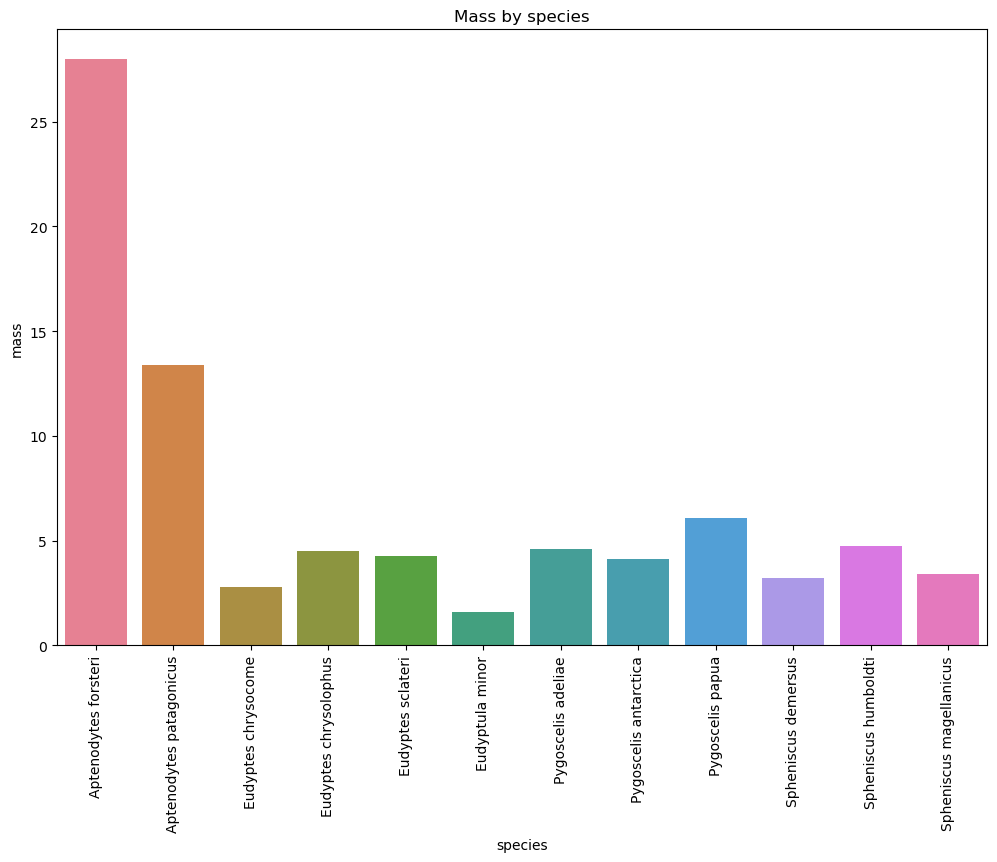

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=penguins_df, x='species', y='mass', hue='species')
plt.title('Mass by species')
ax.set_xticks(range(len(penguins_df['species'])))
ax.set_xticklabels(penguins_df['species'], rotation=90)

plt.show()


# 9. Plot a graph that shows the molecular weight as a function of GC content.

In [ ]:
#Create a scatter plot which shows GC contenet and molecular weight relationship of each penguin species.
#Add a figure legend and give a title.
#Turn off the grid lines.


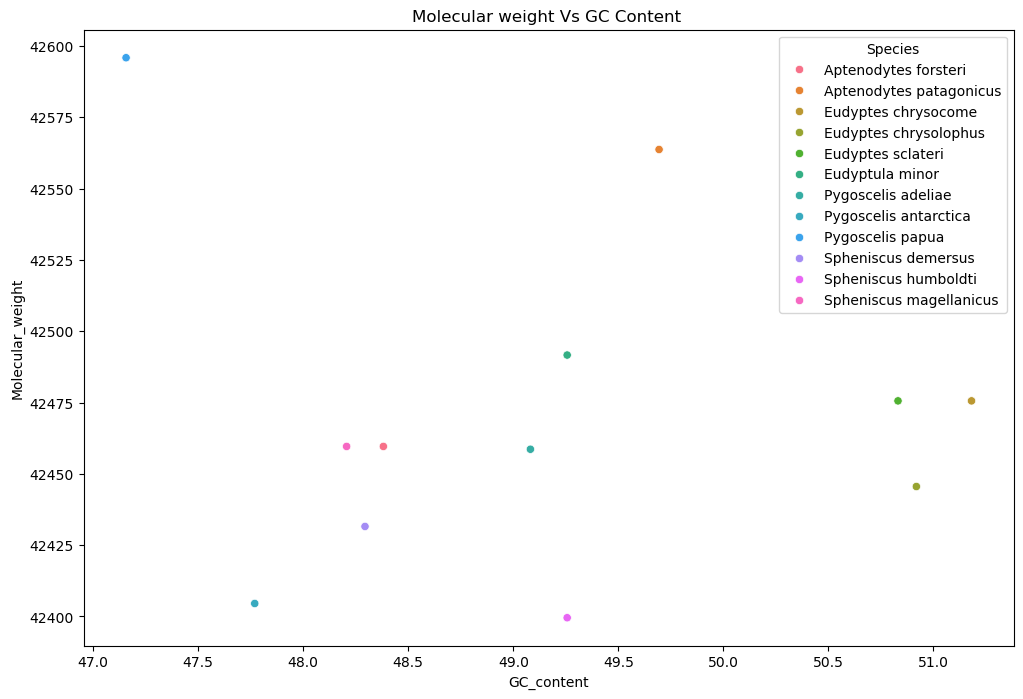

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=penguins_df, x='GC_content', y='Molecular_weight', hue='species')
plt.title('Molecular weight Vs GC Content ')
plt.legend(title='Species')
plt.grid(False)

plt.show()

# 10. Write the entire DataFrame to a new CSV file that includes your new columns.

In [ ]:
#Take the dataframe and write it to a CSV file.
#Read the CSV file and creates a new dataframe.
#Check the new dataframe.

In [11]:
penguins_df.to_csv('penguins_brief_df.csv', index=False)
penguins_bdf = pd.read_csv("penguins_brief_df.csv")
penguins_bdf

,species,mass,Molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


# 11.BONUS: What other visualizations, functions or tasks would you do with this dataset?

In [ ]:
#Read the penguins DataFrame.
#Initialize 'Cytochrome_gene_length' and 'GC_content' columns with 'NaN'.
#Calculate GC content and Cytochrome gene length for each species.
#Plot GC content vs Cytochrome gene length.

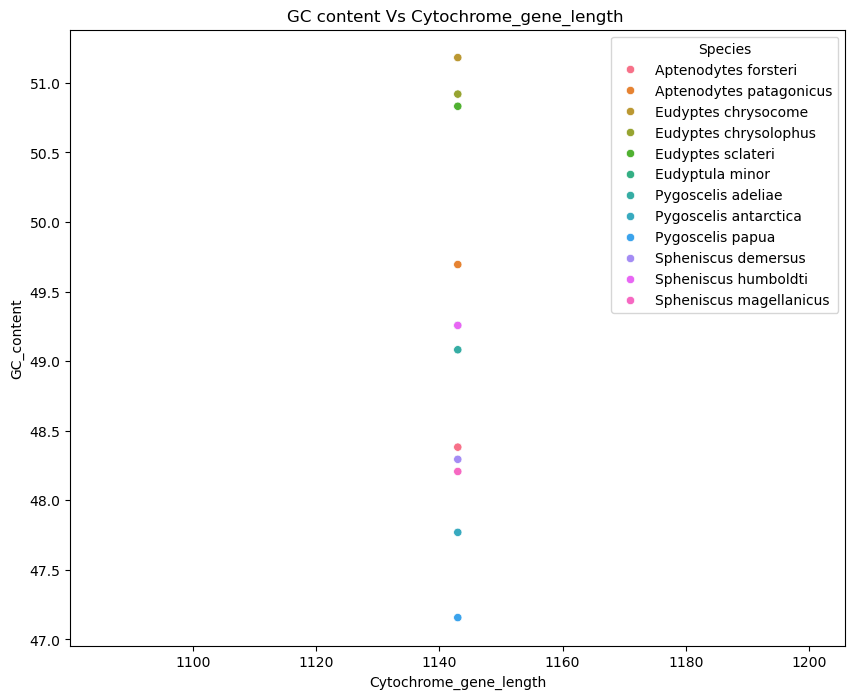

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

penguins_etrdf = pd.read_csv("penguins_mass.csv")
penguins_etrdf['Cytochrome_gene_length'] = 'NaN'
penguins_etrdf['GC_content'] = 'NaN'
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
for species, seq in cytb_seqs.items():
    length = len(seq)
    gc_percent = gc_content(str(seq))
    penguins_etrdf.loc[penguins_etrdf.species == species, 'GC_content'] = gc_percent
    penguins_etrdf.loc[penguins_etrdf.species == species, 'Cytochrome_gene_length'] = length
penguins_etrdf

plt.figure(figsize=(10, 8))
sns.scatterplot(data=penguins_etrdf, x='Cytochrome_gene_length', y='GC_content', hue='species')
plt.title('GC content Vs Cytochrome_gene_length ')
plt.legend(title='Species')
plt.grid(False)
plt.show()
